## Objetctive est de prédire le prix d'un Airbnb  

## Importer les bibliotheque 

In [1]:
!pip install pyplot

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as  plt 

import  seaborn as sns 

##  diviser mon dataset pour les entrainé et testé 
from sklearn.model_selection import train_test_split

import plotly.express as px




from  sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder

## Charger mon dataset 

In [3]:
df = pd.read_csv("D:\ProjetPerso\Projet_IA_airbnbGit\AB_NYC_2019.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Analyser  et traiter mes données  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.columns.to_list()


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [7]:
print("ligne_colonne:" , df.shape , "  ", "size :" , df.size )

ligne_colonne: (48895, 16)    size : 782320


a ) Analyser les colonnes 

In [8]:
#Nombre de données manquantes par colonnes

df['reviews_per_month'].isnull().sum()

df.isnull().sum().sum()

df.isnull().sum().sort_values(ascending=False)



last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
#Obtenir une liste des colonnes avec des données manquantes

column_valeur_maquantes = df.columns[df.isnull().any()]
column_valeur_maquantes

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [10]:
#afficher les colonnes des données maquantes avec leurs valeur 

for column in column_valeur_maquantes :
    print(column , df[column].isnull().sum())


name 16
host_name 21
last_review 10052
reviews_per_month 10052


In [11]:
df.shape

(48895, 16)

b) Supprimer ceratains colonnes qui sont pas utile pour mon prédiction

In [12]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [13]:
df.shape

(48895, 12)

In [14]:
df.isnull().sum().sort_values(ascending=False)
df.isnull().sum().sum()

10052

c) Analyser les lignes 

In [15]:
#trouver les lignes avec des données maquantes 
df.isnull().sum(axis=1)

0        0
1        0
2        1
3        0
4        0
        ..
48890    1
48891    1
48892    1
48893    1
48894    1
Length: 48895, dtype: int64

In [16]:
#Obtenir une liste des lignes avec des données manquantes

donne_manquate_ligne =df.index[df.isnull().any(axis=1)]
donne_manquate_ligne

Index([    2,    19,    26,    36,    38,   193,   204,   260,   265,   267,
       ...
       48885, 48886, 48887, 48888, 48889, 48890, 48891, 48892, 48893, 48894],
      dtype='int64', length=10052)

In [17]:
#Nombre de données manquantes par lignes

df.isnull().sum(axis=1).sort_values(ascending=False)


48894    1
12152    1
12124    1
38504    1
12128    1
        ..
17937    0
17938    0
17939    0
17940    0
24447    0
Length: 48895, dtype: int64

In [18]:
df.isnull().sum()


host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
#remplacer les valeurs des données maquantes par 0 du colonne  "reviews_per_month"

df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\mamou\AppData\Local\Temp\ipykernel_18296\4127710017.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [20]:
df.shape

(48895, 12)

In [21]:
#les données maquantes
df.isnull().sum().sum()


0

In [22]:
# voir le type des serie 

df.dtypes


host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Comprendre les données

In [23]:
# id : identifiant
# name : nom
# host_id : identifiant de l'hôte
# host_name : nom de l'hôte
# neighbourhood_group : groupe de quartiers
# neighbourhood : quartier
# latitude : latitude
# longitude : longitude
# room_type : type de chambre
# price : prix
# minimum_nights : nombre minimum de nuits
# number_of_reviews : nombre d'avis
# last_review : dernier avis
# reviews_per_month : avis par mois
# calculated_host_listings_count : nombre d'annonces calculées par l'hôte
# availability_365 : disponibilité pour 365 jours

## Analyser et comprendre les valeur catégorials

C:\Users\mamou\AppData\Local\Temp\ipykernel_18296\2511398326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x="neighbourhood_group" , data=df ,palette= custom_palette )


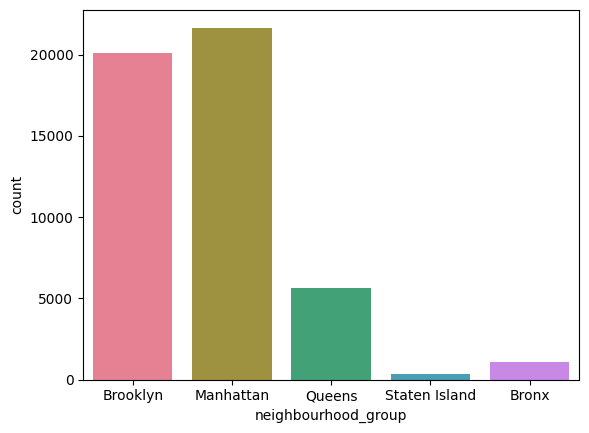

In [24]:
df["neighbourhood_group"].value_counts()

# Créer une palette de couleurs personnalisée
custom_palette = sns.color_palette("husl", df['neighbourhood_group'].nunique())


ax= sns.countplot(x="neighbourhood_group" , data=df ,palette= custom_palette )

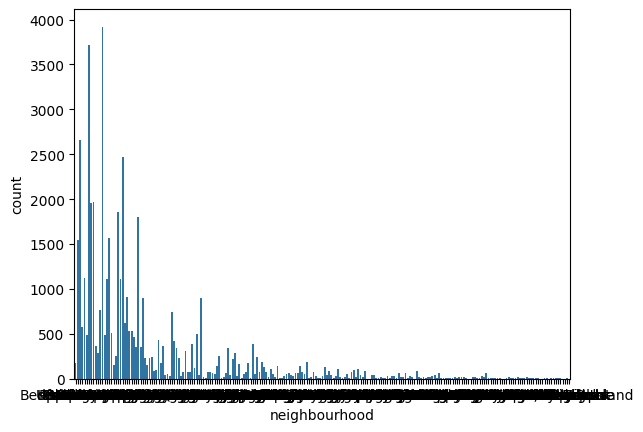

In [25]:
df["neighbourhood"].value_counts()

ax= sns.countplot(x="neighbourhood" , data=df)

C:\Users\mamou\AppData\Local\Temp\ipykernel_18296\4250021460.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x="room_type" , data=df ,  palette= custom_palette)


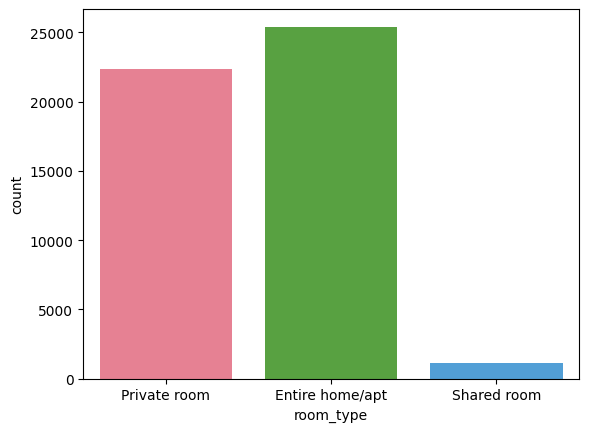

In [26]:
df["room_type"].value_counts()

# Créer une palette de couleurs personnalisée
custom_palette = sns.color_palette("husl", df['room_type'].nunique())


ax= sns.countplot(x="room_type" , data=df ,  palette= custom_palette)

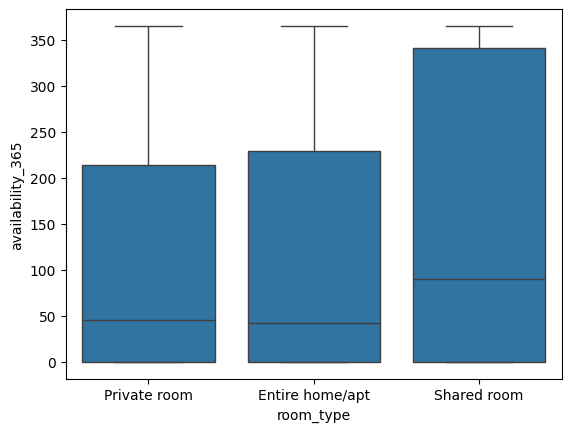

In [27]:
ax= sns.boxplot(x="room_type" , y="availability_365" , data=df)

In [28]:
fig = px.scatter(df, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

In [29]:
df["minimum_nights"].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [30]:
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Modification des types des colonnes 

In [31]:
label_encoder = LabelEncoder()

df['neighbourhood_group_encoded']= label_encoder.fit_transform(df['neighbourhood_group'])

df["neighbourhood_Encoded"]= label_encoder.fit_transform(df["neighbourhood"])

df["room_type_Encoded"]= label_encoder.fit_transform(df["room_type"])
 

In [32]:
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
neighbourhood_group_encoded         int32
neighbourhood_Encoded               int32
room_type_Encoded                   int32
dtype: object

In [33]:
df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1, inplace=True)

df.dtypes

df.columns

Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_encoded', 'neighbourhood_Encoded',
       'room_type_Encoded'],
      dtype='object')

Enlever les Valuer extraime

In [34]:
# Affichage des statistiques descriptives avant suppression des valeurs aberrantes
df["price"].describe()

# Calcul des quartiles et de l'IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


# Définir les limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtrer les données pour supprimer les valeurs aberrantes
df_filtered_price = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_filtered_price['price'].describe()


count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64

In [35]:
# Affichage des statistiques descriptives avant suppression des valeurs aberrantes
df["minimum_nights"].describe()

# Calcul des quartiles et de l'IQR
Q1 = df_filtered_price['minimum_nights'].quantile(0.25)
Q3 = df_filtered_price['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1


# Définir les limites inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtrer les données pour supprimer les valeurs aberrantes
df_filtered =  df_filtered_price[(df_filtered_price['minimum_nights'] >= lower_bound) & (df_filtered_price['minimum_nights'] <= upper_bound) ]

df_filtered["minimum_nights"].describe()



count    39738.000000
mean         2.696160
std          1.863537
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: minimum_nights, dtype: float64

In [36]:
df_filtered.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_encoded,neighbourhood_Encoded,room_type_Encoded
count,3.973800e+04,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000,39738.000000
mean,6.621640e+07,40.727573,-73.949146,119.001258,2.696160,26.377548,1.232123,3.073054,97.169837,1.656425,104.946072,0.549751
std,7.750186e+07,0.056293,0.047708,67.184264,1.863537,47.474653,1.683484,19.743865,124.366313,0.762448,69.150553,0.545306
min,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.824440e+06,40.688080,-73.981040,65.000000,1.000000,1.000000,0.070000,1.000000,0.000000,1.000000,51.000000,0.000000
50%,3.073608e+07,40.720080,-73.953320,100.000000,2.000000,7.000000,0.510000,1.000000,25.000000,2.000000,94.000000,1.000000
75%,1.036117e+08,40.763260,-73.932170,154.750000,3.000000,29.000000,1.890000,2.000000,179.000000,2.000000,175.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,334.000000,11.000000,629.000000,58.500000,327.000000,365.000000,4.000000,220.000000,2.000000


<Figure size 1000x700 with 0 Axes>

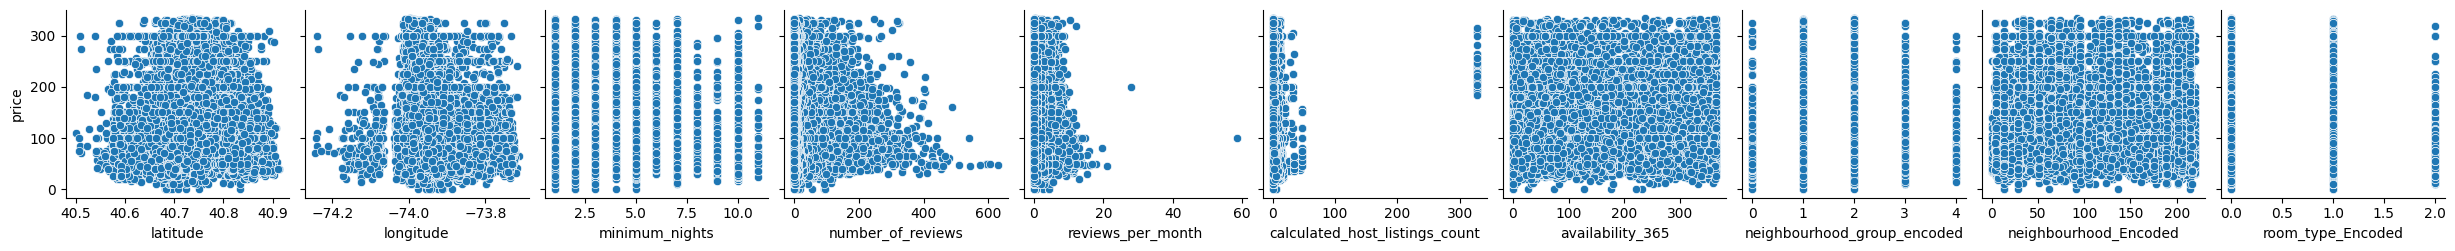

In [37]:
#tracer un graphe pour voir les colonne important 

plt.figure(figsize=(10, 7))

sns.pairplot(df_filtered , x_vars=['latitude', 'longitude', 'minimum_nights','number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365', 'neighbourhood_group_encoded','neighbourhood_Encoded', 'room_type_Encoded'], y_vars=["price"] )

plt.show()

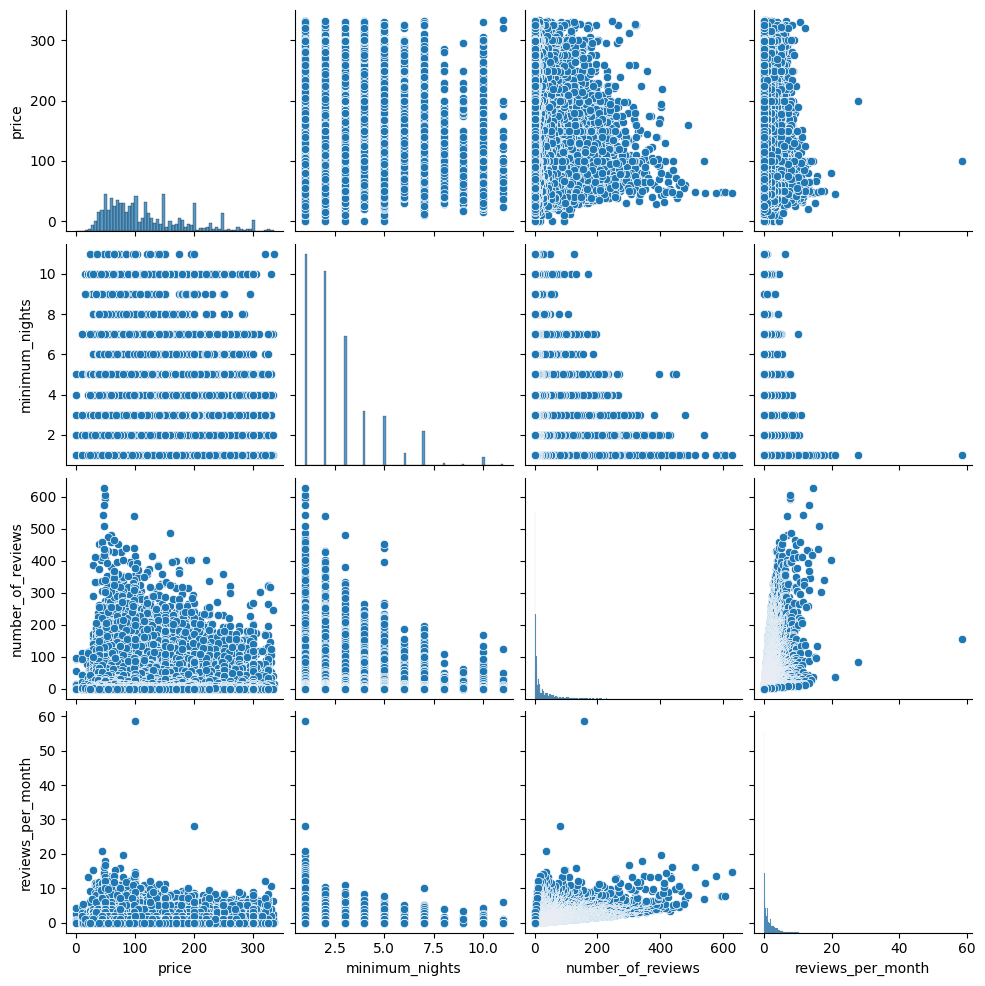

In [38]:
sns.pairplot(df_filtered, vars=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month'])
plt.show()

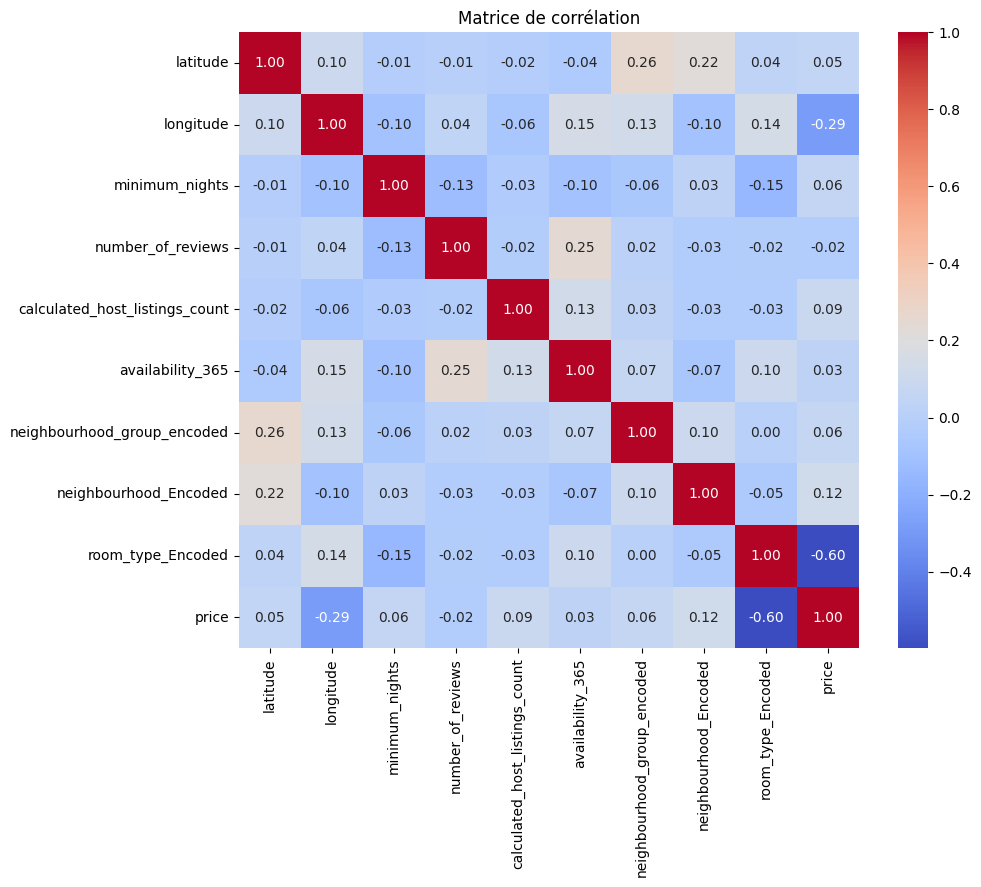

In [39]:

# Créer la matrice de corrélation
X_corrélation = df_filtered[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_encoded', 'neighbourhood_Encoded', 'room_type_Encoded', 'price']].corr()

# Tracer la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(X_corrélation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

## Diviser mon dataframme 

In [40]:
x= df_filtered.drop("price" , axis=1)
y=df_filtered["price"]


x , y 

x_train , x_test , y_train, y_test = train_test_split( x, y, test_size = 0.2 ,  random_state=0)


In [41]:
x_train.shape ,   y_train.shape

((31790, 11), (31790,))

## Création de model 

In [42]:
model = LinearRegression()
model

LinearRegression()

Entrainement des données 

In [43]:
model.fit(x_train , y_train)

LinearRegression()

##  Prédiction du modél 

In [44]:
y_predic = model.predict(x_test)
y_predic


array([169.26512274,  96.95479097, 126.02843158, ..., 166.59159405,
       156.23135332,  59.9059962 ])

## Evaluation du model 

In [45]:
##coefficient de corrélation 
R2 = model.score(x_test, y_test)

R2


0.441472149805745

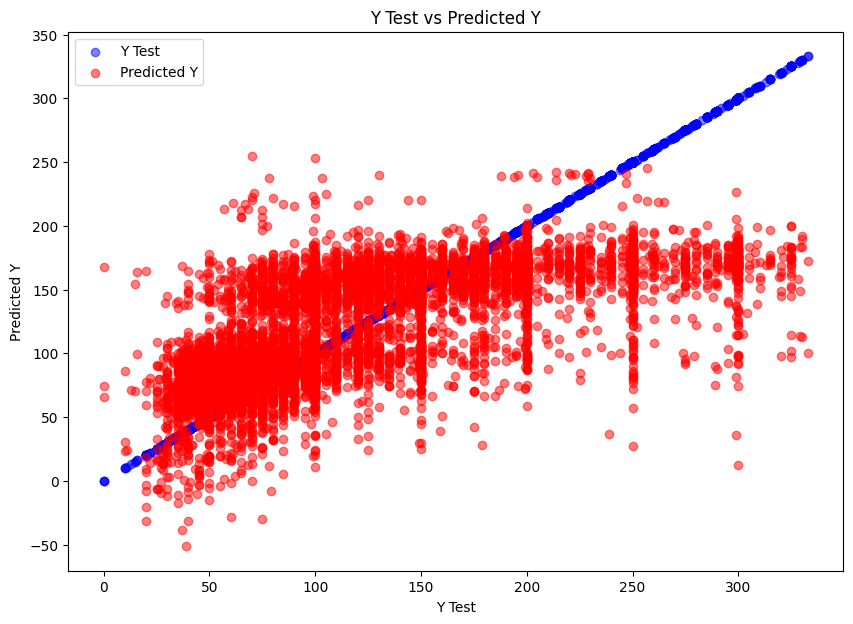

In [46]:

plt.figure(figsize=(10, 7))

# Tracer les données y_test avec la couleur bleue
plt.scatter(y_test, y_test, color='blue', label='Y Test', alpha=0.5)

# Tracer les données y_pred avec la couleur rouge
plt.scatter(y_test, y_predic, color='red', label='Predicted Y', alpha=0.5)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Y Test vs Predicted Y')

plt.legend()

plt.show()
